In [81]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
# reading dataset
dataset = pd.read_csv('Diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [83]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [84]:
# LOGISTIC REGRESSION

In [85]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l1',dual=False,tol=0.01,C=10.0,fit_intercept=True,intercept_scaling=7,class_weight=None,random_state=None,solver='lbfgs',max_iter=100,multi_class='auto',verbose=0,warm_start=False,n_jobs=None,l1_ratio=None)
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [86]:
# Prediction with custom input
print(classifier.predict_proba([[6,148,72,35,0,33.6,0.627,50]])*10)

[[3.40635199 6.59364801]]


In [87]:
y_pred = classifier.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[119  11]
 [ 26  36]]


0.8072916666666666

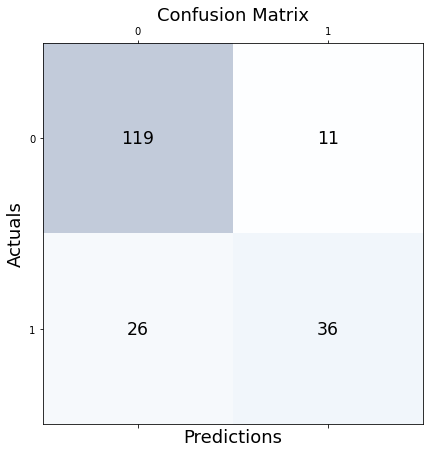

In [89]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.25)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [90]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.51 %
Standard Deviation: 4.68 %


In [91]:
from sklearn.model_selection import GridSearchCV
parameters = [{"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 76.04 %
Best Parameters: {'C': 100.0, 'penalty': 'l1'}


In [92]:
# RANDOM FOREST CLASSIFIER

In [93]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [94]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy=", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy= 1.0


In [95]:
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7864583333333334


In [96]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[116  14]
 [ 27  35]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       130
           1       0.71      0.56      0.63        62

    accuracy                           0.79       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.78      0.79      0.78       192



In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, predictions)
print(cmr)
accuracy_score(y_test, predictions)

[[116  14]
 [ 27  35]]


0.7864583333333334

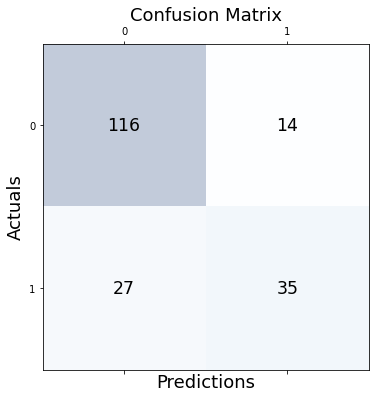

In [98]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cmr, cmap=plt.cm.Blues, alpha=0.25)
for i in range(cmr.shape[0]):
    for j in range(cmr.shape[1]):
        ax.text(x=j, y=i,s=cmr[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [99]:
# import seaborn as sns
# sns.scatterplot(x="Glucose", y="BloodPressure", data=dataset);
# sns.lmplot(x="Glucose", y="BloodPressure", data=dataset);

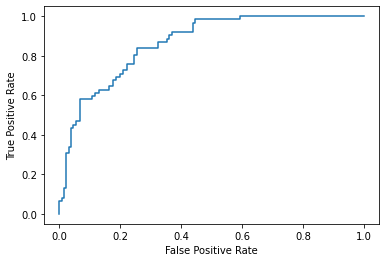

In [100]:
from sklearn import metrics

#defining metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

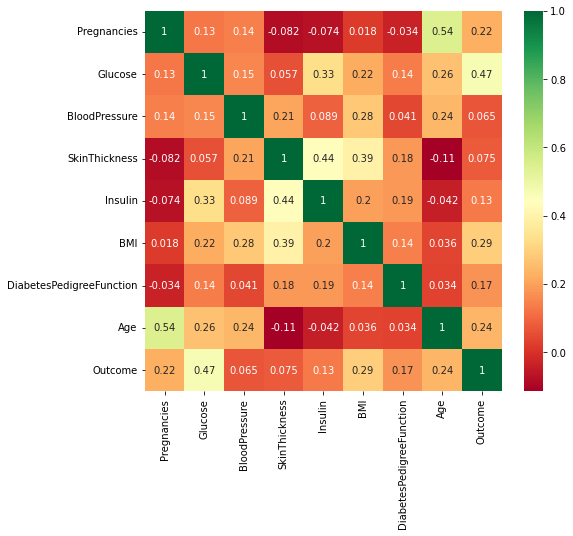

In [101]:
# HEAT MAP

plt.figure(figsize=(8,7))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(dataset.corr(), annot=True,cmap ='RdYlGn')